# 파이토치 입문

## 1. 파이토치 기본

### (3) 데이터 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as tr
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

#### 1) 파이토치에서 제공하는 자체데이터 

In [2]:
transf = tr.Compose([tr.Resize(16), tr.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform=transf) # train=True 이면 train set을 불러오고, train=False면 test set을 불러온다. 
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform=transf) # 전처리를 위해 transforem에 전처리를 위해 작성한 변수 transf를 할당한다. 


Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(type(testset))
print(testset)
print(trainset)

<class 'torchvision.datasets.cifar.CIFAR10'>
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=16, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=16, interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [4]:
print(trainset[0][0].size())
print(trainset[0][1]) # trainset[0]은 데이터와 라벨이 한쌍으로 이뤄진 tuple형태이다. [0]은 이미지이고, [1]은 라벨이다. 

torch.Size([3, 16, 16])
6


In [5]:
trainloader = DataLoader(trainset, batch_size = 50, shuffle = True) # 배치사이즈는 배치하나에 50장의 이미지를 배치하겠다는 뜻이다. 
testloader = DataLoader(testset, batch_size = 50, shuffle = True)

print(len(trainloader)) # trainset의 이미지 개수는 50,000개 이고, 배치하나당 이미지가 50개씩이나 총 배치개수는 1000개이다. 
print(len(testloader)) # testset은 이미지개수가 10,000개 이니 총배치는 200개이다. 

1000
200


In [6]:
images, labels = iter(trainloader).next() # iter 함수와 next함수는 파이썬에서 제공하는 함수이다. 
print(images.size())
print(images[0].size())

torch.Size([50, 3, 16, 16])
torch.Size([3, 16, 16])


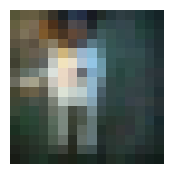

In [7]:
oneshot = images[0].permute(1, 2, 0).numpy() # torch.Size([3, 16, 16])에서 3은 rgb이고 나머지는 해상도인데, 보통 넘파이 배열로 이미지를 출력하기 위해서는 h w c로 바꿔야 하게 때문에 permute로 차원의 순서를 바꾸고, 넘파이 배열로 변경했다. 
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

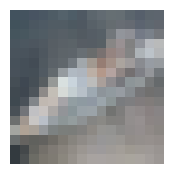

In [8]:
oneshot = images[5].permute(1, 2, 0).numpy()
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

#### 2) 같은 클래스 별로 폴더를 정리한 경우

In [9]:
# 데이터가 같은 클래스 별로 미리 폴더를 정리한 경ㅇ, ImageFolder 하나로 개인데이터를 사용 할 수 있다 
# 예를 들어 class라는 폴더 안에 tiger, lion폴더를 미리 만들고, ImageFolder에 상위 폴더 './class'를 입력하면 이미지와 라벨을 정리해서 불러온다. 

transf = tr.Compose([tr.Resize(128), tr.ToTensor()])
trainset = torchvision.datasets.ImageFolder(root = './data/class', transform=transf)
trainloader = DataLoader(trainset, batch_size = 1, shuffle = False)


FileNotFoundError: [Errno 2] No such file or directory: './data/class'

#### 3) 커스텀 데이터 불러오기

In [10]:
from torch.utils.data import Dataset

# 커스텀 데이터셋 기본형태, Dataset은 추상클래스이므로, super().__init__()으로 상속 할 필요가 없다. 
class Class_Name(Dataset): # Dataset클래스를 상속받아 클래스를 초기화 한다. 

    def __init__(self): # 데이터 세팅에 필요한 것들을 미리 정의한다. 
        pass

    def __getitem__(self, index): # DataLoader에서 샘플이 요청되면 이 함수로 인덱스에 해당하는 샘플을 찾아서 반환한다. 
        pass

    def __len__(self): 
        pass

In [11]:
# 32, 32 크기인 RGB 컬러 이미지  100장과 그에 대한 라벨일 되어 있는 커스텀 데이터 세트 예시

# 데이터 만들기
train_images = np.random.randint(256, size=(100, 32, 32, 3))/255  # /255 하게 되면 배열에 있는 모든 값을 255로 나눠준다. 정규화 과정
train_labels = np.random.randint(2, size = (100, 1))


# 커스텀 데이터셋 선언
class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        self.x_data = torch.FloatTensor(x_data)
        self.x_data = self.x_data.permute(0, 3, 1, 2)
        self.y_data = torch.LongTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index): # __getitem__에는 뽑아낼 데이터에 대해서 인덱스 처리를 해준다. 
        return self.x_data[index], self.y_data[index] # data와 label을 튜플 형태로 반환
    
    def __len__(self): # 미리 선언한 self.len을 반환 할 수 있도록 처리해준다. 
        return self.len
    
train_data = TensorData(train_images, train_labels) # TensorData 클래스를 train_data로 정의한 뒤에 DataLoader에 넣어주면 배치 데이터 형태로 사용가능
train_loader = DataLoader(train_data, batch_size = 10, shuffle = True)

In [12]:
len(train_images)

100

#### 4) 커스텀 데이터와 커스텀 전처리 사용하기

- 파이토치는 자유롭게 데이터를 처리해 dnn에서 연산 할수 있도록 한다. 
- 이미지의 경우 PIL Image 타입이거나 Tensor탑일때 사용가능하다.

In [13]:
x = .4
print(x)

print(int(1/x))
print(1/x)

print(np.random.randint(0, 10, 1))
print(np.random.randint(0, 10, 3))

0.4
2
2.5
[8]
[0 0 8]


In [28]:
# preprocessing class for tensor transform

class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample # sample을 매개변수로 받아 튜플을 각각의 변수로 쪼갠다. 
        inputs = torch.FloatTensor(inputs)
        inputs = inputs.permute(2, 0, 1) # 기본 파이썬 데이터이면 상관 없으나 그외의 데이터는 d, h, w 순으로 바꿔줘야 한다. 
        return inputs, torch.LongTensor(labels)
    
# __call__함수는 입력값을 배치사이즈 전체가 아닌 입력값 하나하나를 처리하기 때문에 permute할때 차원에 주의 해야 한다. 


# CutOut은 이미지 내부에 무작위로 사각형 영역을 선택하여 0으로 만드는 data augmentation 기법이다.

class CutOut:

    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)

    def __call__(self, sample):
        inputs, labels = sample
        active = int(np.random.randint(0, self.ratio, 1))  # np.random.randint(시작, 끝, 개수) '시작'과 '끝' 사이에서 '개수'만큼의 숫자를 뽑는다. 
        
        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h) # input값의 크기중 작은 값을 찾는다. 즉 w, h중 작은 값을 찾는다.
            box_size = int(min_len//4) # 전체 이미지 길의 25%이하 크기의 정사각형 박스를 구하기 위해 버린 나눗셈 진행
            idx = int(np.random.randint(0, min_len-box_size, 1)) 
            inputs[:, idx:idx+box_size, idx:idx+box_size] = 0
        
        return inputs, labels
    

In [29]:
# MyDataset에서 전처리 추가하기

class MyDataset(Dataset):

    def __init__(self, x_data, y_data, transform = None):
        self.x_data = x_data
        self.y_data = y_data
        self.transform = transform
        self.len = len(y_data)
        self.tensor = ToTensor() # data와 label을 한번에 텐서로 만들기 위해 인스턴스를 선언한다. 

    def __getitem__(self,index): # __getitem__은 각 인덱스에 해당하는 data와 label을 튜플 형태로 반환하므로 전처리를 위해서는 튜플 형태로 먼전 변환 필요가 있다. 
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)
        else:
            sample = self.tensor(sample)

        return sample
    
    def __len__(self):
        return self.len


In [30]:
trans = tr.Compose([ToTensor(), CutOut()])
dataset1 = MyDataset(train_images, train_labels, transform=trans)
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

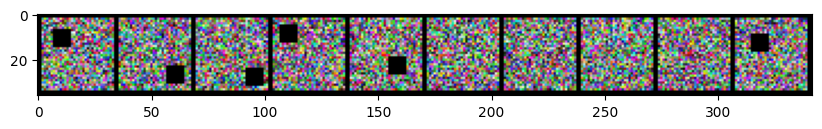

In [35]:
import torchvision

images1, labels1 = iter(train_loader1).next()


def imshow(img):
    plt.figure(figsize=(10, 100))
    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.show()

imshow(torchvision.utils.make_grid(images1, nrow=10))

#### 5) 커스텀 데이터와 파이토치 제공 전처리 사용하기

In [36]:
# 파이토치에서 제공하는 전처리 method로 사용할 경우 이미지만 받아서 처리하도록 코드를 변경해야 한다. 
# 기존 커스텀 CutOut은 data와 label 모두 받아 분리해서 처리하지만 기본 제공 전처리 method들은 이미지만 처리하기 때문에 cutout도 같은 양식으로 변경하는 것


class CutOut:

    def __init__(self, ratio=0.5):
        self.ratio = int(1/ratio)

    def __call__(self, inputs):
        active = int(np.random.randint(0, self.ratio, 1))

        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len//4)
            idx = int(np.random.randint(0, min_len-box_size, 1))
            inputs[:, idx:idx+box_size, idx:idx+box_size] = 0

        return inputs
    

transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

Files already downloaded and verified


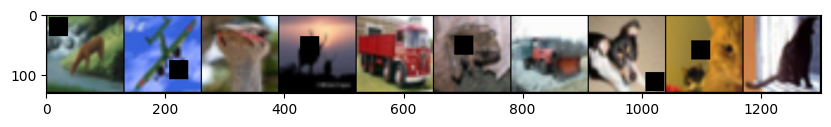

torch.Size([10, 3, 128, 128])


In [37]:
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images, nrow=10))
print(images.size())